# KERRY MATRIX
> notebook that creates the kerry datasets.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In [6]:
#collapse 
#IMPORTS
import pandas as pd
from matplotlib import pyplot as plt

rtData = pd.read_csv('https://d14wlfuexuxgcm.cloudfront.net/covid/rt.csv')
dailyData = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')

#SET VARIABLES
today = '2020-08-02'
week = '2020-08-02/2020-07-26'
dateRange = '20200802'

#KERRY LOCATIONS AND POPULATION DATA
kerryLocations = pd.read_csv('../kerry.csv')
kerryLocations.columns = map(str.lower, kerryLocations.columns)
kerryCols=['state', 'population']
kerryLocs = kerryLocations[kerryCols]
print ('Kerry Locations Information being loaded...')
kerryLocs

Kerry Locations Information being loaded...


,state,population
0,AL,4903185
1,AR,3017804
2,CA,39512223
3,FL,21477737
4,GA,10617423
5,IA,3155070
6,IL,12671821
7,IN,6732219
8,KS,2913314
9,MD,6045680


In [10]:
#collapse 
#rtlive data cleaning
rtCleaned = rtData[rtData['date']==today]
rtColumns = ['date', 'region', 'mean']
rtCleaned = rtCleaned[rtColumns]
rtCleaned = rtCleaned.rename(columns = {'region':'state'})
rtCleaned = rtCleaned.sort_values('state', ascending=True)

In [3]:
#PRINT CLEANED DATA
print ('rtLive Data being loaded...')
rtCleaned

rtLive Data being loaded...


,date,state,mean
7999,2020-08-02,AK,1.044038
3674,2020-08-02,AL,1.038194
4947,2020-08-02,AR,1.032027
7165,2020-08-02,AZ,0.868990
7844,2020-08-02,CA,0.887025
6379,2020-08-02,CO,0.998260
952,2020-08-02,CT,0.981955
2076,2020-08-02,DC,1.038579
1594,2020-08-02,DE,0.946947
2723,2020-08-02,FL,0.963125


In [11]:
#collapse 
#DAILY DATA CLEANING
dailyColumns = ['date', 'state', 'death', 'positiveIncrease', 'totalTestResultsIncrease', 'deathIncrease']
dailyData = dailyData[dailyColumns]
dailyData = dailyData.sort_values('state', ascending=True)
dailyCleaned = dailyData[dailyData['date'].astype(str)==dateRange]
dailyCleaned

,date,state,death,positiveIncrease,totalTestResultsIncrease,deathIncrease
168,20200802,AK,24.0,157,4457,0
169,20200802,AL,1627.0,2095,8699,24
170,20200802,AR,458.0,0,0,-2
171,20200802,AS,0.0,0,0,0
172,20200802,AZ,3765.0,1465,7778,18
173,20200802,CA,9356.0,9032,149388,132
174,20200802,CO,1691.0,458,7169,0
175,20200802,CT,4432.0,0,0,0
176,20200802,DC,586.0,69,3411,1
177,20200802,DE,585.0,72,2015,0


In [31]:
#collapse 
#FILTER DATASETS TO KERRY LOCATIONS AND MERGE SETS INTO ONE TABLE

startFile=pd.merge(kerryLocs, rtCleaned, on=['state'])
print ('Kerry File Building...')



newData=pd.merge(startFile, dailyCleaned, on=['state'])
newData=newData.rename(columns={'date_x':'date'})
colss = ['date', 'state', 'population', 'mean', 'death', 'positiveIncrease', 'totalTestResultsIncrease', 'deathIncrease']
newData[colss].head(50)

Kerry File Building...


,date,state,population,mean,death,positiveIncrease,totalTestResultsIncrease,deathIncrease
0,2020-08-02,AL,4903185,1.038194,1627.0,2095,8699,24
1,2020-08-02,AR,3017804,1.032027,458.0,0,0,-2
2,2020-08-02,CA,39512223,0.887025,9356.0,9032,149388,132
3,2020-08-02,FL,21477737,0.963125,7206.0,7104,41554,62
4,2020-08-02,GA,10617423,0.951249,3840.0,3165,28555,15
5,2020-08-02,IA,3155070,0.987130,876.0,516,5148,4
6,2020-08-02,IL,12671821,1.079792,7714.0,1467,38945,14
7,2020-08-02,IN,6732219,1.003324,2975.0,735,10437,4
8,2020-08-02,KS,2913314,1.064063,358.0,0,0,0
9,2020-08-02,MD,6045680,1.031470,3515.0,909,15432,9


In [40]:
#collapse  
read = pd.read_csv('../us.csv')
read=read.rename(columns={'State':'state'})
filler=['state','Social Index Current', 'Change in SD index', 'SD Past', 'Rt Current',
       'Rt Past', 'Change in Rt', 'Stratified Rt', 'tests per case',
       'Test Increase Current', 'Change in Pos Test Increase',
       'Increase in Pos Tests Past',
       'Per Capita Positive Tests (July 07 - July 13) per 100K', 'TPR Current',
       'Change in Test Positive Rate', 'TPR Past',
       'Stratified Test Positive Rate', 'Outbreak Index',
       'Weekly Deaths Current', 'Change in Weekly Deaths',
       'Weekly Deaths Past', 'Weekly Death Rate per 100K Population',
       'Total Deaths Current', 'Change in Total Deaths', 'Total Deaths Past',
       'Cumulative Death Rate per 100K', 'Total Tests Current',
       'Change in Total Tests', 'Total Tests Past',
       'Tests per 100K Population']

read=read[filler]
readMerge=pd.merge(read, newData, on='state')

readMerge.head(50)



,state,Social Index Current,Change in SD index,SD Past,Rt Current,Rt Past,Change in Rt,Stratified Rt,tests per case,Test Increase Current,...,Total Tests Past,Tests per 100K Population,population,date,mean,date_y,death,positiveIncrease,totalTestResultsIncrease,deathIncrease
0,AL,NaN,-29.0,29.0,1.111944,1.111944,0.0,#REF!,14.88930282,11546.0,...,56092.0,1144.0,4903185,2020-08-02,1.038194,20200802,1627.0,2095,8699,24
1,AR,NaN,-26.0,26.0,1.037065,1.037065,0.0,#REF!,32.62921348,5150.0,...,42509.0,1409.0,3017804,2020-08-02,1.032027,20200802,458.0,0,0,-2
2,CA,NaN,-37.0,37.0,0.970088,0.970088,0.0,#REF!,18.59767462,54351.0,...,888118.0,2248.0,39512223,2020-08-02,0.887025,20200802,9356.0,9032,149388,132
3,FL,NaN,-34.0,34.0,0.986019,0.986019,0.0,#REF!,21.515181,59137.0,...,321301.0,1496.0,21477737,2020-08-02,0.963125,20200802,7206.0,7104,41554,62
4,GA,NaN,-30.0,30.0,0.953783,0.953783,0.0,#REF!,12.9180545,24592.0,...,193438.0,1822.0,10617423,2020-08-02,0.951249,20200802,3840.0,3165,28555,15
5,IA,NaN,-25.0,25.0,1.010162,1.010162,0.0,#REF!,6.070516096,3287.0,...,31630.0,1003.0,3155070,2020-08-02,0.987130,20200802,876.0,516,5148,4
6,IL,NaN,-27.0,27.0,1.092876,1.092876,0.0,#REF!,6.08053467,10625.0,...,264702.0,2089.0,12671821,2020-08-02,1.079792,20200802,7714.0,1467,38945,14
7,IN,NaN,-25.0,25.0,1.001587,1.001587,0.0,#REF!,6.380462725,5526.0,...,67691.0,1005.0,6732219,2020-08-02,1.003324,20200802,2975.0,735,10437,4
8,KS,NaN,-27.0,27.0,1.071201,1.071201,0.0,#REF!,6.92339979,2704.0,...,22903.0,786.0,2913314,2020-08-02,1.064063,20200802,358.0,0,0,0
9,MD,NaN,-33.0,33.0,1.047616,1.047616,0.0,#REF!,4.486504193,6268.0,...,105119.0,1739.0,6045680,2020-08-02,1.031470,20200802,3515.0,909,15432,9


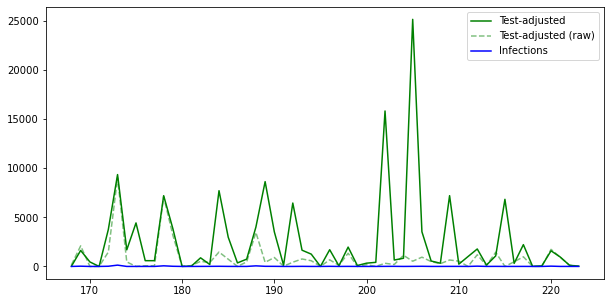

In [42]:
#collapse  
#chart over time
fig, ax = plt.subplots(figsize=(10,5))
dailyData.death.plot(c="g", label="Test-adjusted")
dailyData.positiveIncrease.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
dailyData.deathIncrease.plot(c="b", label="Infections")
fig.set_facecolor('w')
ax.legend();